# Melakukan Import Library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#untuk megabaikan warning
warnings.filterwarnings("ignore")

print("Semua Library Diatas Termuat")

Semua Library Diatas Termuat


# Loading DataSet

In [30]:
df = pd.read_csv("House Price Prediction Dataset.csv")
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


# Data Understanding

## Penjelasan Kolom

In [31]:
feature_dataset = pd.Series(["Date","PM10","SO2","CO","O3","NO2","Max","Critical Component","Categoy"],index=[1,2,3,4,5,6,7,8,9])
penjelasan_feature = pd.Series(["Tanggal pengukuran","Pengukuran Materi Partikulat","Pengukuran Sulfur Dioksida","Pengukuran Karbon Monoksida","Pengukuran ozon","Pengukuran Natrium DIoksida","Nilai pengukuran tertinggi","Komponen nilai pengukuran tertinggi","Kategori pencemaran udara baik atau tidak"],index=[1,2,3,4,5,6,7,8,9])

deskripsi_variabel = pd.DataFrame({"Nama Feature":feature_dataset,
                                  "Penjelasan":penjelasan_feature})
deskripsi_variabel

,Nama Feature,Penjelasan
1,Date,Tanggal pengukuran
2,PM10,Pengukuran Materi Partikulat
3,SO2,Pengukuran Sulfur Dioksida
4,CO,Pengukuran Karbon Monoksida
5,O3,Pengukuran ozon
6,NO2,Pengukuran Natrium DIoksida
7,Max,Nilai pengukuran tertinggi
8,Critical Component,Komponen nilai pengukuran tertinggi
9,Categoy,Kategori pencemaran udara baik atau tidak


## informasi Data

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


## Statistik Deskriptif 

In [33]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


# Data Cleansing dan data Preprocesing

## Mengecek nilai yang hilang

In [34]:
df.isna().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [35]:
df.isna().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

## Mengecek Outlier

In [36]:
df_baru = df[["Area","Bedrooms","Bathrooms","Floors","Condition","Garage","YearBuilt","Price"]]

In [37]:
df_baru

,Area,Bedrooms,Bathrooms,Floors,Condition,Garage,YearBuilt,Price
0,1360,5,4,3,Excellent,No,1970,149919
1,4272,5,4,3,Excellent,No,1958,424998
2,3592,2,2,3,Good,No,1938,266746
3,966,4,2,2,Fair,Yes,1902,244020
4,4926,1,4,2,Fair,Yes,1975,636056
...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,Poor,No,1923,295620
1996,3046,5,2,1,Poor,Yes,2019,580929
1997,1062,5,1,2,Poor,No,1903,476925
1998,4062,3,1,2,Excellent,Yes,1936,161119


In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [39]:
df_baru["Condition"]=encoder.fit_transform(df_baru["Condition"])
df_baru["Garage"]=encoder.fit_transform(df_baru["Garage"])

In [22]:
df_baru

,Area,Bedrooms,Bathrooms,Floors,Condition,Garage,YearBuilt,Price
0,1360,5,4,3,0,0,1970,149919
1,4272,5,4,3,0,0,1958,424998
2,3592,2,2,3,2,0,1938,266746
3,966,4,2,2,1,1,1902,244020
4,4926,1,4,2,1,1,1975,636056
...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,3,0,1923,295620
1996,3046,5,2,1,3,1,2019,580929
1997,1062,5,1,2,3,0,1903,476925
1998,4062,3,1,2,0,1,1936,161119


In [40]:
df_baru["Condition"].value_counts()

Condition
1    521
0    511
3    507
2    461
Name: count, dtype: int64

In [41]:
df["Condition"].value_counts()

Condition
Fair         521
Excellent    511
Poor         507
Good         461
Name: count, dtype: int64

## 4.3.Seleksi Fitur

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

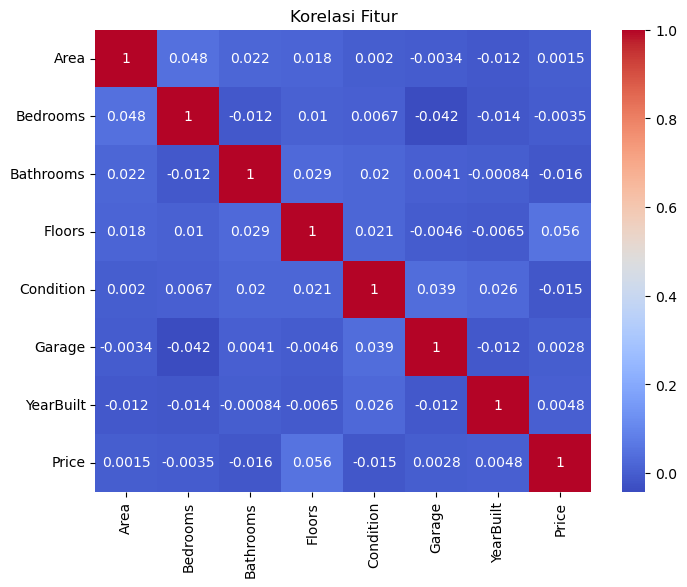

In [43]:
#menghitung korelasi
korelasi_fitur = df_baru.corr()

#membuat heatmap
plt.figure(figsize=(8,6))
sns.heatmap(korelasi_fitur, annot=True, cmap="coolwarm")
plt.title("Korelasi Fitur")
plt.show()

## 4.4. Standardisasi

In [53]:
from sklearn.preprocessing import StandardScaler

#pisahkan kolom
colom_pisah = ["Garage","Condition","Price"]

#kolom yang akan di standarisasi
standarisasi_kolom = [col for col in df_baru.columns if col not in colom_pisah]

scaler = StandardScaler()

#standarisasi
df_baru[standarisasi_kolom] = scaler.fit_transform(df_baru[standarisasi_kolom])
df_baru

,Area,Bedrooms,Bathrooms,Floors,Condition,Garage,YearBuilt,Price
0,-1.101471,1.401791,1.305568,1.244151,0,0,0.238155,149919
1,1.147485,1.401791,1.305568,1.244151,0,0,-0.095942,424998
2,0.622317,-0.704581,-0.498326,1.244151,2,0,-0.652770,266746
3,-1.405759,0.699667,-0.498326,0.008035,1,1,-1.655061,244020
4,1.652574,-1.406705,1.305568,0.008035,1,1,0.377363,636056
...,...,...,...,...,...,...,...,...
1995,1.705091,1.401791,1.305568,1.244151,3,0,-1.070391,295620
1996,0.200638,1.401791,-0.498326,-1.228081,3,1,1.602385,580929
1997,-1.331618,1.401791,-1.400273,0.008035,3,0,-1.627219,476925
1998,0.985301,-0.002457,-1.400273,0.008035,0,1,-0.708453,161119


# 5. Melatih Model

In [62]:
from sklearn.model_selection import train_test_split

#memasukkan linear regresi
from sklearn.linear_model import LinearRegression

#memasukkan GBB
from sklearn.ensemble import GradientBoostingRegressor

#memasukkan R2 skor dan MSE
from sklearn.metrics import r2_score, mean_squared_error

In [73]:
#membagi x dan y
X = df_baru.drop(columns=["Price"])
y = df_baru["Price"]
X


,Area,Bedrooms,Bathrooms,Floors,Condition,Garage,YearBuilt
0,-1.101471,1.401791,1.305568,1.244151,0,0,0.238155
1,1.147485,1.401791,1.305568,1.244151,0,0,-0.095942
2,0.622317,-0.704581,-0.498326,1.244151,2,0,-0.652770
3,-1.405759,0.699667,-0.498326,0.008035,1,1,-1.655061
4,1.652574,-1.406705,1.305568,0.008035,1,1,0.377363
...,...,...,...,...,...,...,...
1995,1.705091,1.401791,1.305568,1.244151,3,0,-1.070391
1996,0.200638,1.401791,-0.498326,-1.228081,3,1,1.602385
1997,-1.331618,1.401791,-1.400273,0.008035,3,0,-1.627219
1998,0.985301,-0.002457,-1.400273,0.008035,0,1,-0.708453


In [74]:
y

0       149919
1       424998
2       266746
3       244020
4       636056
         ...  
1995    295620
1996    580929
1997    476925
1998    161119
1999    482525
Name: Price, Length: 2000, dtype: int64

In [63]:
model_mlr = LinearRegression()
model_gbr = GradientBoostingRegressor()

In [77]:
ration_test = [0.2, 0.3, 0.4]

## 5.1. Multi Linear Regression

In [80]:
for i in ration_test:
    
    #setting rasio loop
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=i, random_state=42)
    
    #memuat model
    model = model_mlr
    
    #melatih model
    model.fit(X_train, y_train)
    
    #menghitung sisi dari pelatihan
    y_pred_train = model.predict(X_train)
    
    #menghitung sisi dari pengujian
    y_pred_test = model.predict(X_test)
    
#menampilkan akurasi dan mse dari training dan testing 
#r2_score : 
    print("R2_score pelatihan MLR untuk ratio", i, "adalah:", {r2_score(y_pred_train,y_train)} )
    print("R2_score pengujian MLR untuk ratio", i, "adalah:", {r2_score(y_pred_test,y_test)} )

R2_score pelatihan MLR untuk ratio 0.2 adalah: {-148.90710199256552}
R2_score pengujian MLR untuk ratio 0.2 adalah: {-161.42127410661877}
R2_score pelatihan MLR untuk ratio 0.3 adalah: {-122.28303609807928}
R2_score pengujian MLR untuk ratio 0.3 adalah: {-127.62145547458476}
R2_score pelatihan MLR untuk ratio 0.4 adalah: {-83.20808135924699}
R2_score pengujian MLR untuk ratio 0.4 adalah: {-87.065406446471}


## 5.2. Gradient Boosting Regression

In [81]:
for j in ration_test:
    
    #setting rasio loop
    X1_train, X1_test, y1_train, y1_test = train_test_split(X,y,test_size=j, random_state=42)
    
    #memuat model
    model2 = model_gbr
    
    #melatih model
    model2.fit(X1_train, y1_train)
    
    #menghitung sisi dari pelatihan
    y_pred_train1 = model2.predict(X1_train)
    
    #menghitung sisi dari pengujian
    y_pred_test1 = model2.predict(X1_test)
    
#menampilkan akurasi dan mse dari training dan testing 
#r2_score : 
    print("R2_score pelatihan GBR untuk ratio", j, "adalah:", {r2_score(y_pred_train1,y1_train)} )
    print("R2_score pengujian GBR untuk ratio", j, "adalah:", {r2_score(y_pred_test1,y1_test)} )

R2_score pelatihan GBR untuk ratio 0.2 adalah: {-14.389650799173785}
R2_score pengujian GBR untuk ratio 0.2 adalah: {-21.947763542182898}
R2_score pelatihan GBR untuk ratio 0.3 adalah: {-12.043617629369338}
R2_score pengujian GBR untuk ratio 0.3 adalah: {-18.436936698499682}
R2_score pelatihan GBR untuk ratio 0.4 adalah: {-8.960067572784855}
R2_score pengujian GBR untuk ratio 0.4 adalah: {-19.203764106573825}
